# To Explore Unsupervised Machine Learning

K- Means Clustering

It is very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm

#### Import all required Libraries

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

#### Read the data from the link of the data as below

In [255]:
data = pd.read_csv("Mall_Customers.csv")

#### Get the data of above five lines

In [256]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [257]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [259]:
# drop kolom yang tidak diperlukan
data = data.drop(columns=['CustomerID', 'Gender'])

# jalankan proses one-hote encoding dengan pd.get_dummies(data)
data = pd.get_dummies(data)

data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


### To find cluster in k-means

Finding the optimum number of clusters for k-means classification


In [260]:
x = data.iloc[:, [0, 1, 2]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

 Plotting the results onto a line graph, 
 
 `allowing us to observe 'The elbow'

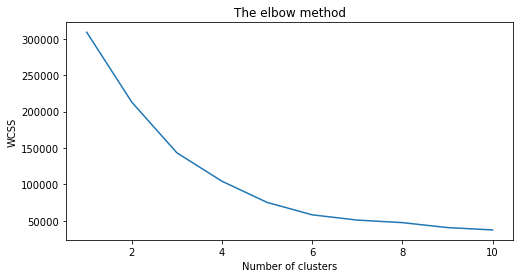

In [261]:
x = data.iloc[:, [0, 1, 2]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 4))    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#### Create K-means classifiers

In [272]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Visualising the clusters - On the first two columns

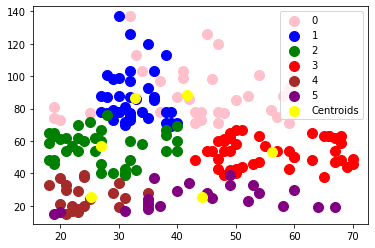

In [273]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'pink', label = '0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = '1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = '2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1],s = 100, c = 'red', label = '3')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1],s = 100, c = 'brown', label = '4')
plt.scatter(x[y_kmeans == 5, 0], x[y_kmeans == 5, 1],s = 100, c = 'purple', label = '5')
#plt.scatter(x[y_kmeans == 6, 0], x[y_kmeans == 6, 1],s = 100, c = 'brown', label = '6')
#plt.scatter(x[y_kmeans == 7, 0], x[y_kmeans == 7, 1],s = 100, c = 'orange', label = '7')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

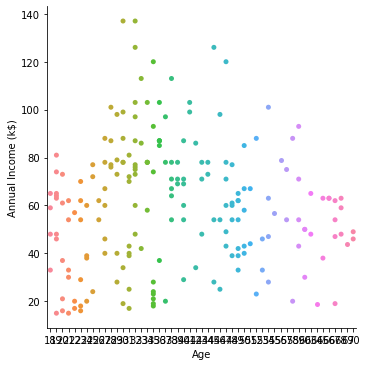

In [264]:
sns.catplot(x="Age", y="Annual Income (k$)",jitter = False, data=data)

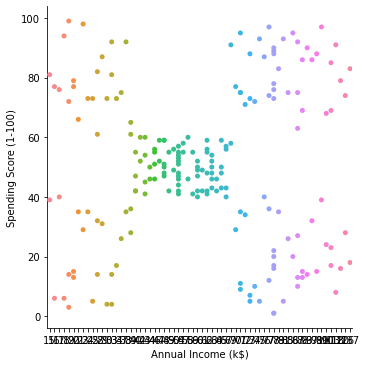

In [265]:
sns.catplot(x="Annual Income (k$)", y="Spending Score (1-100)",jitter = False, data=data)

In [278]:
# sns.catplot(x="Gender_Female", y="Gender_Male",jitter = False, data=data)

### K Means Cluster Creation

In [267]:
from sklearn.cluster import KMeans

Create a model with 3 clusters

In [274]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(data)

KMeans(n_clusters=6)

In [275]:
labels = kmeans.labels_
labels

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 1, 5,
       2, 3, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 5,
       5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 0, 5, 0, 4, 0, 4, 0, 4, 0,
       5, 0, 4, 0, 4, 0, 4, 0, 4, 0, 5, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [276]:
# Converted the data to a dataframe and create a cluster Map
cluster_map = pd.DataFrame(data)

# Add a column 'cluster' and to assign the labels
cluster_map['Label'] = labels
cluster_map

,Age,Annual Income (k$),Spending Score (1-100),Label
0,19,15,39,2
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,2
...,...,...,...,...
195,35,120,79,0
196,45,126,28,4
197,32,126,74,0
198,32,137,18,4


In [277]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(data, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)
print("Inertia  :", kmeans.inertia_)

Silhouetter Score: 0.455
Inertia  : 58305.2205981153


In [279]:
data.to_csv('Mall_clustered.csv')